In this assessment, you'll continue working with the heart disease dataset from the UC Irvine Machine Learning Repository.

Load the dataset from Thinkful's database. To connect to the database, use these credentials:

The dataset needs some preprocessing. So, before working with the dataset, apply the following code:

Here, X will represent your features and y will hold the labels. If y is equal to 1, that indicates that the corresponding patient has heart disease. And if y is equal to 0, then the patient doesn't have heart disease.

To complete this assessment, submit a link to a Jupyter Notebook containing your solutions to the following tasks below. You can also take a look at these example solutions.

Produce dendrograms for the heart disease dataset. Use three different linkage methods: complete, average, and ward. Which linkage method do you think produces the most reasonable result?
Apply agglomerative clustering to the heart disease data by setting n_clusters=2. Try the three linkage methods above, and get ARI and silhouette scores for each of your solutions. Compare the results with each other. Then compare the results with the results from the k-means solution that you implemented in the previous lesson's assessment. Which algorithm and setting perform better?
Although you won’t be graded on this assessment, it is still required.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn import datasets, metrics

In [2]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, text

import warnings
warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'

In [3]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
#insurance_df = pd.read_sql_query('select * from medicalcosts',con=engine)

heartdisease_df = pd.DataFrame(engine.connect().execute(text('select * from heartdisease')))

# No need for an open connection, because you're only doing a single query
engine.dispose()

heartdisease_df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


In [4]:
# Define the features and the outcome
X = heartdisease_df.iloc[:, :13]
y = heartdisease_df.iloc[:, 13]

# Replace missing values (marked by `?`) with a `0`
X = X.replace(to_replace='?', value=0)

# Binarize y so that `1` means heart disease diagnosis and `0` means no diagnosis
y = np.where(y > 0, 1, 0)

In [5]:
# Loading the data from scikit-learn's datasets
#iris = datasets.load_iris()
#X = iris.data
#y = iris.target

# Standardizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [6]:
# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage='complete',
                                      affinity='cosine',
                                      n_clusters=3)

# Fit model
clusters = agg_cluster.fit_predict(X_std)

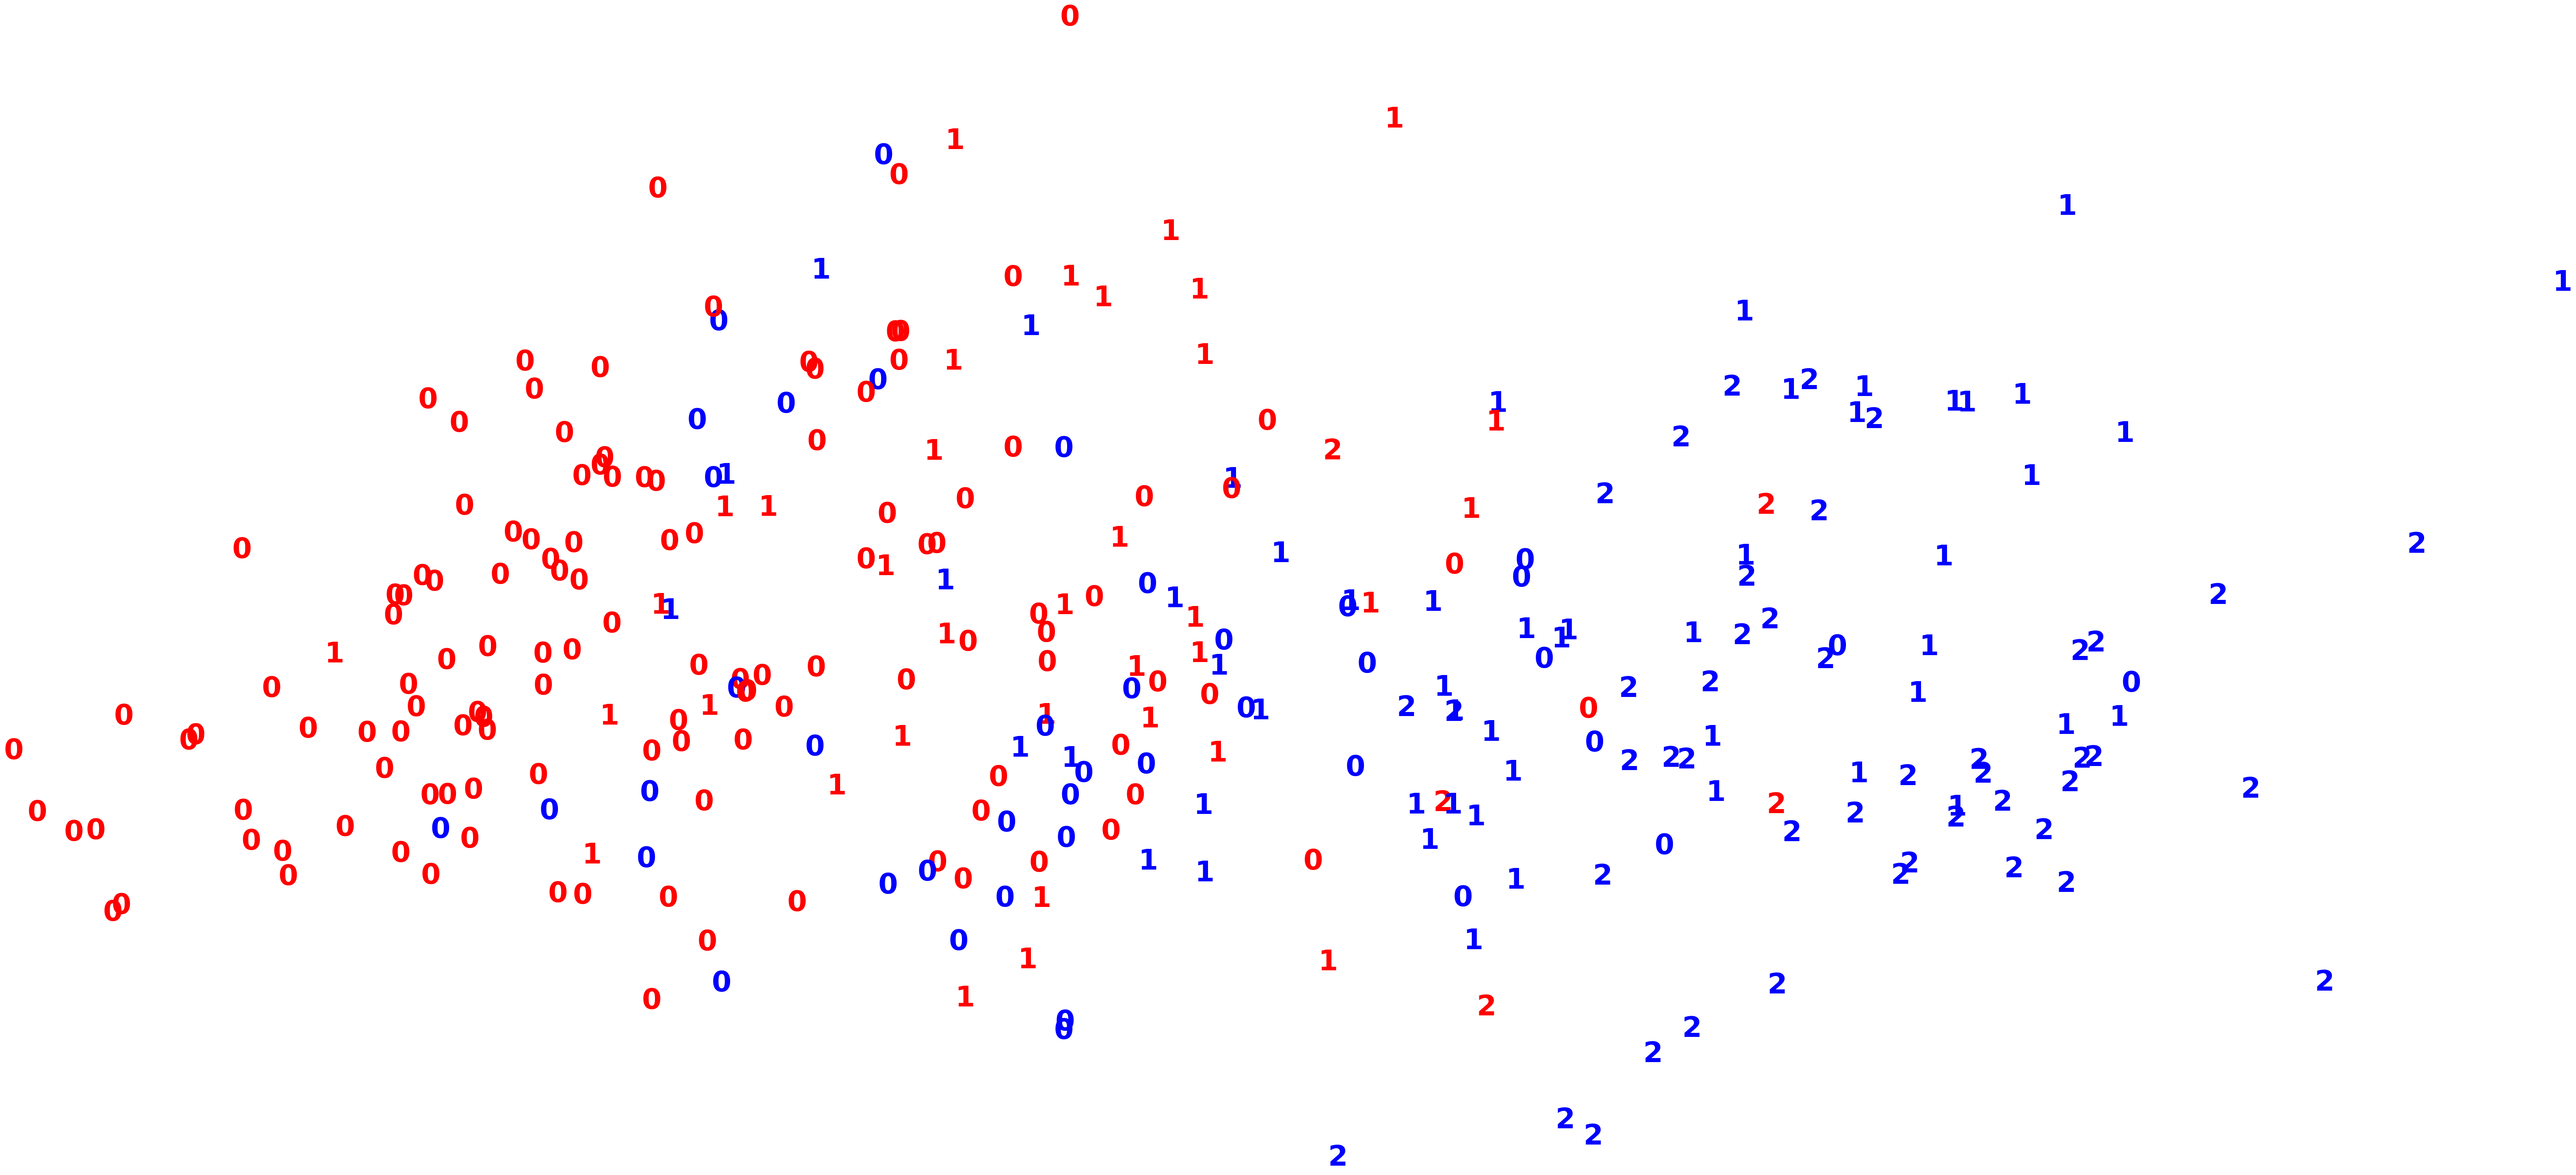

In [7]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [8]:
print("Adjusted Rand Index of the Agglomerative Clustering solution: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))
print("The silhouette score of the Agglomerative Clustering solution: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

Adjusted Rand Index of the Agglomerative Clustering solution: 0.18301939761943767
The silhouette score of the Agglomerative Clustering solution: 0.09438720643481781


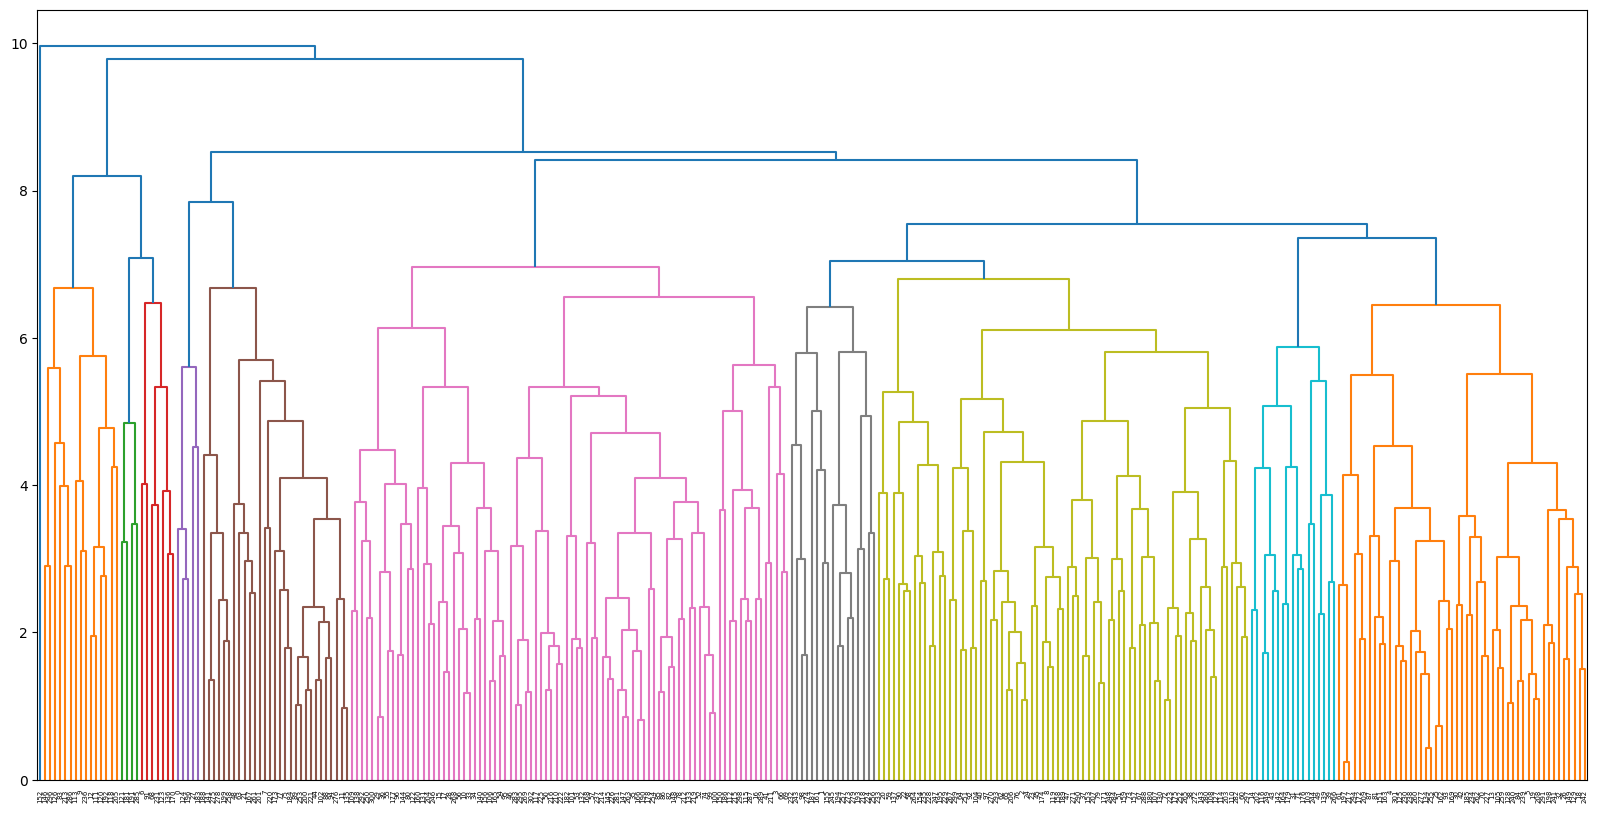

In [9]:
plt.figure(figsize=(20,10))
dendrogram(linkage(X_std, method='complete'))
plt.show()

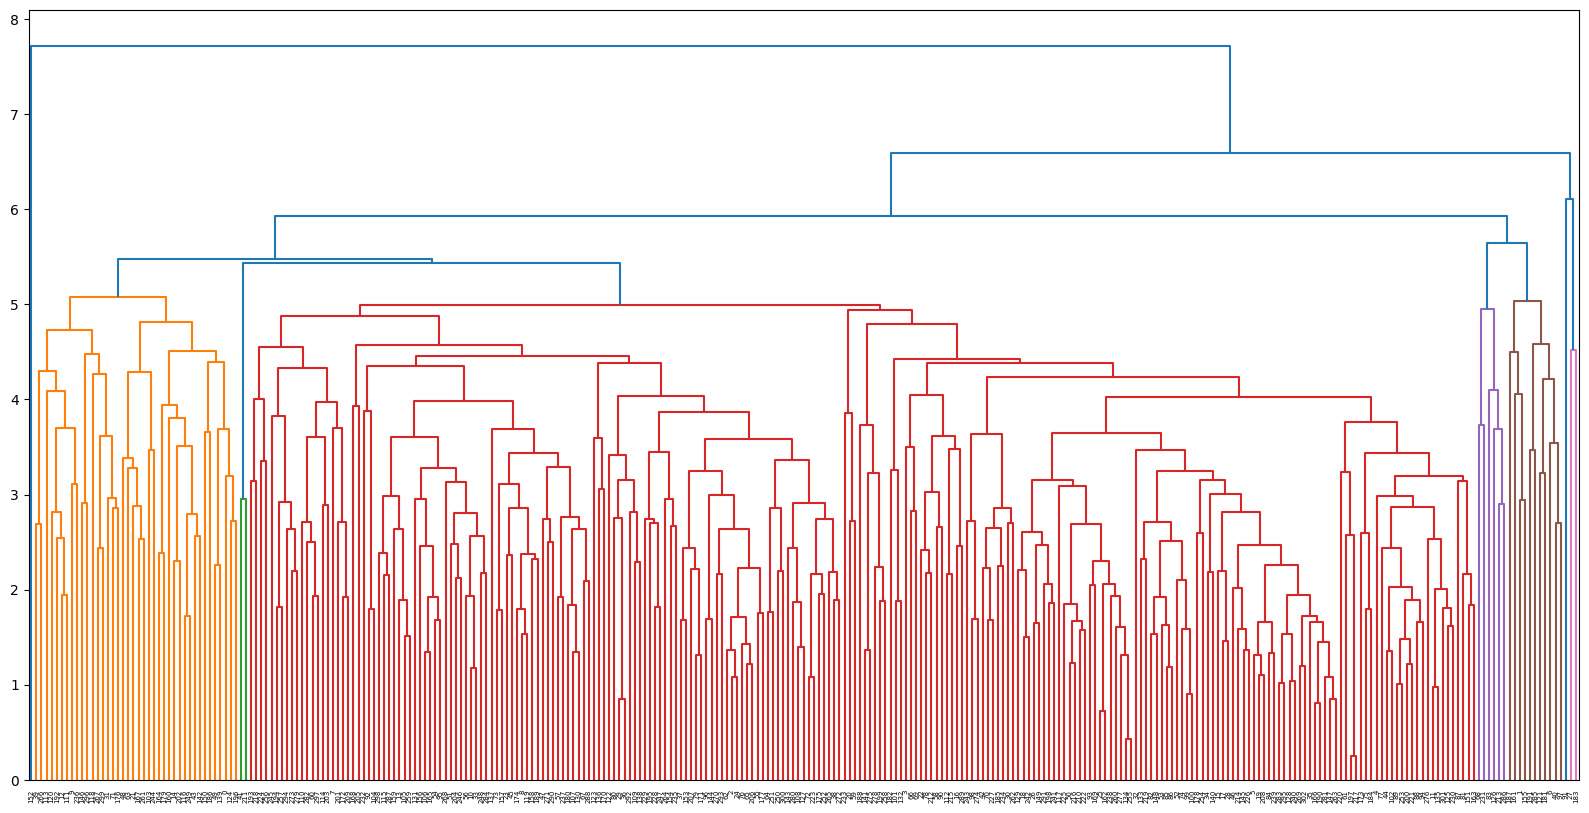

In [10]:
plt.figure(figsize=(20,10))
dendrogram(linkage(X_std, method='average'))
plt.show()

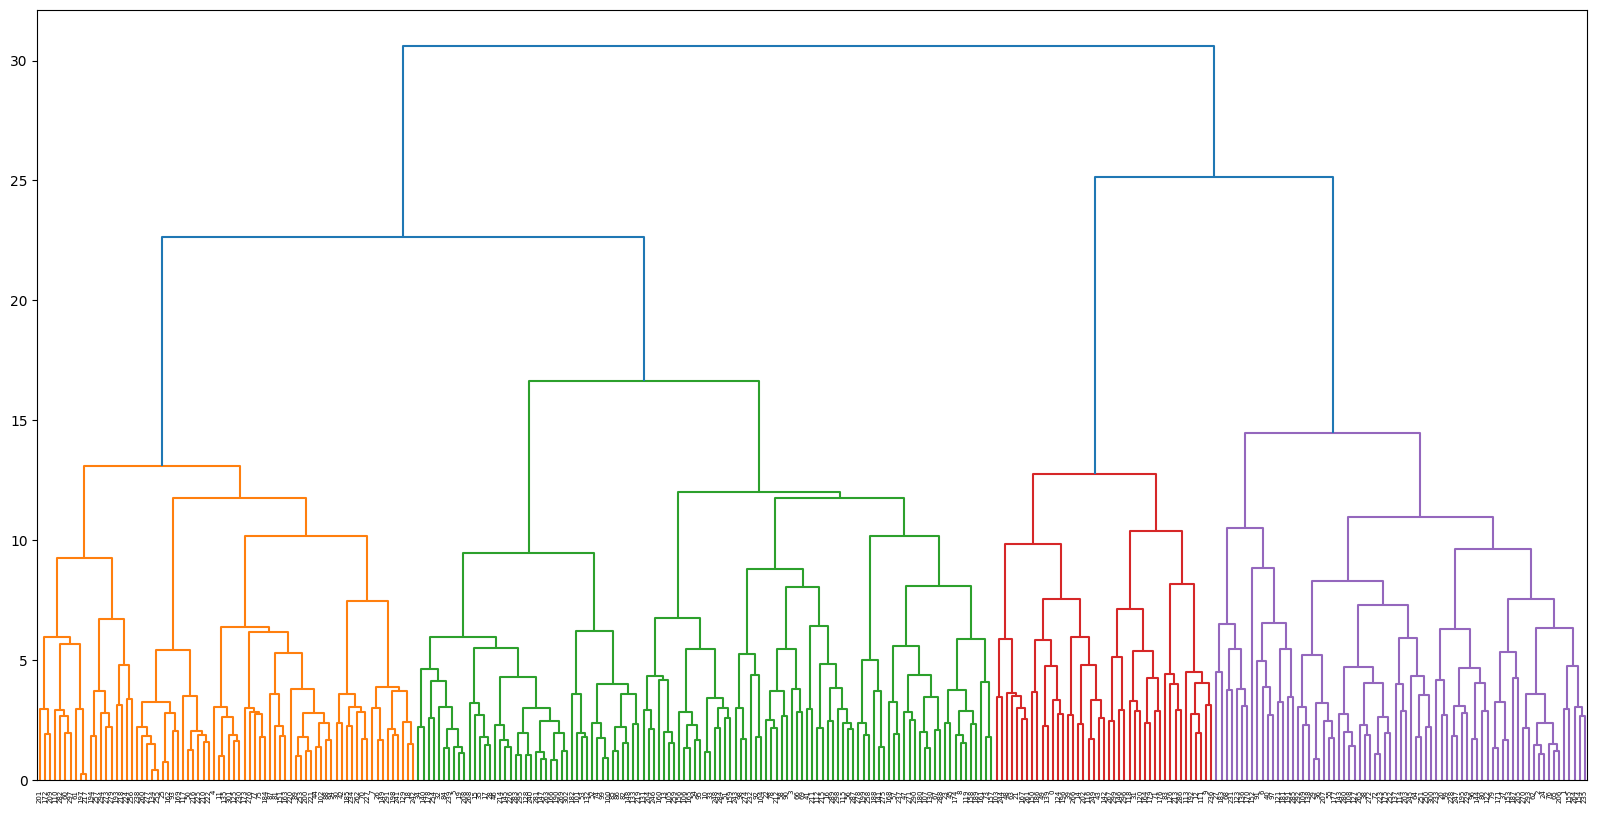

In [11]:
plt.figure(figsize=(20,10))
dendrogram(linkage(X_std, method='ward'))
plt.show()

In [12]:
# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage='complete',
                                      affinity='cosine',
                                      n_clusters=2)

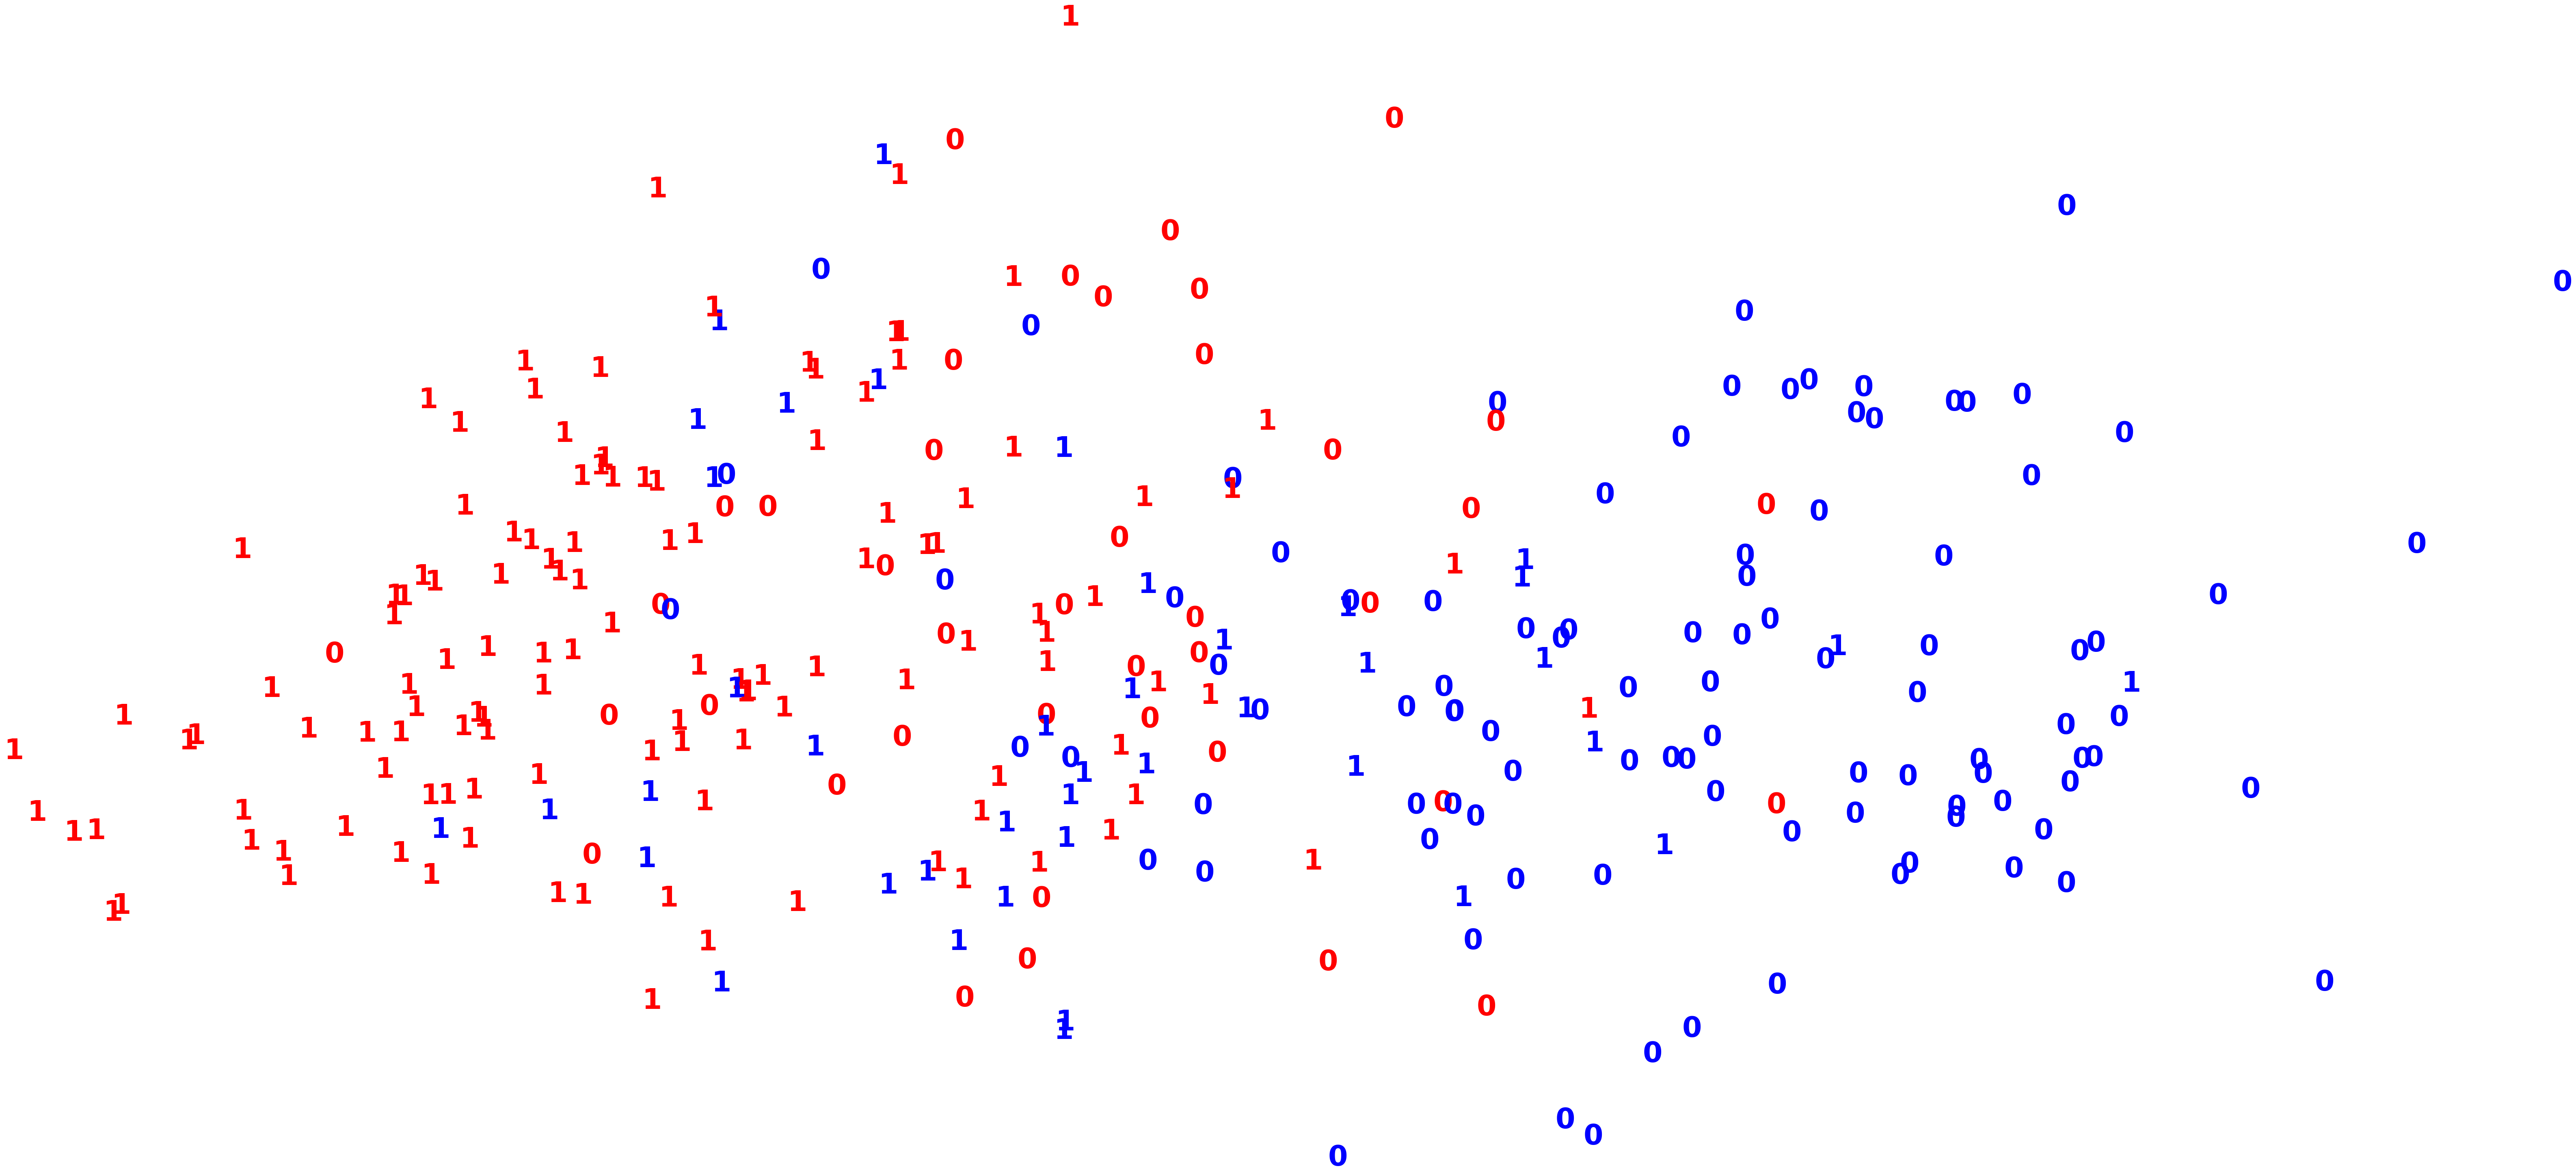

In [13]:
# Fit model
clusters = agg_cluster.fit_predict(X_std)

pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()


In [14]:

print("Adjusted Rand Index of the Agglomerative Clustering solution: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))
print("The silhouette score of the Agglomerative Clustering solution: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))


Adjusted Rand Index of the Agglomerative Clustering solution: 0.21394030618551016
The silhouette score of the Agglomerative Clustering solution: 0.11730765444448985


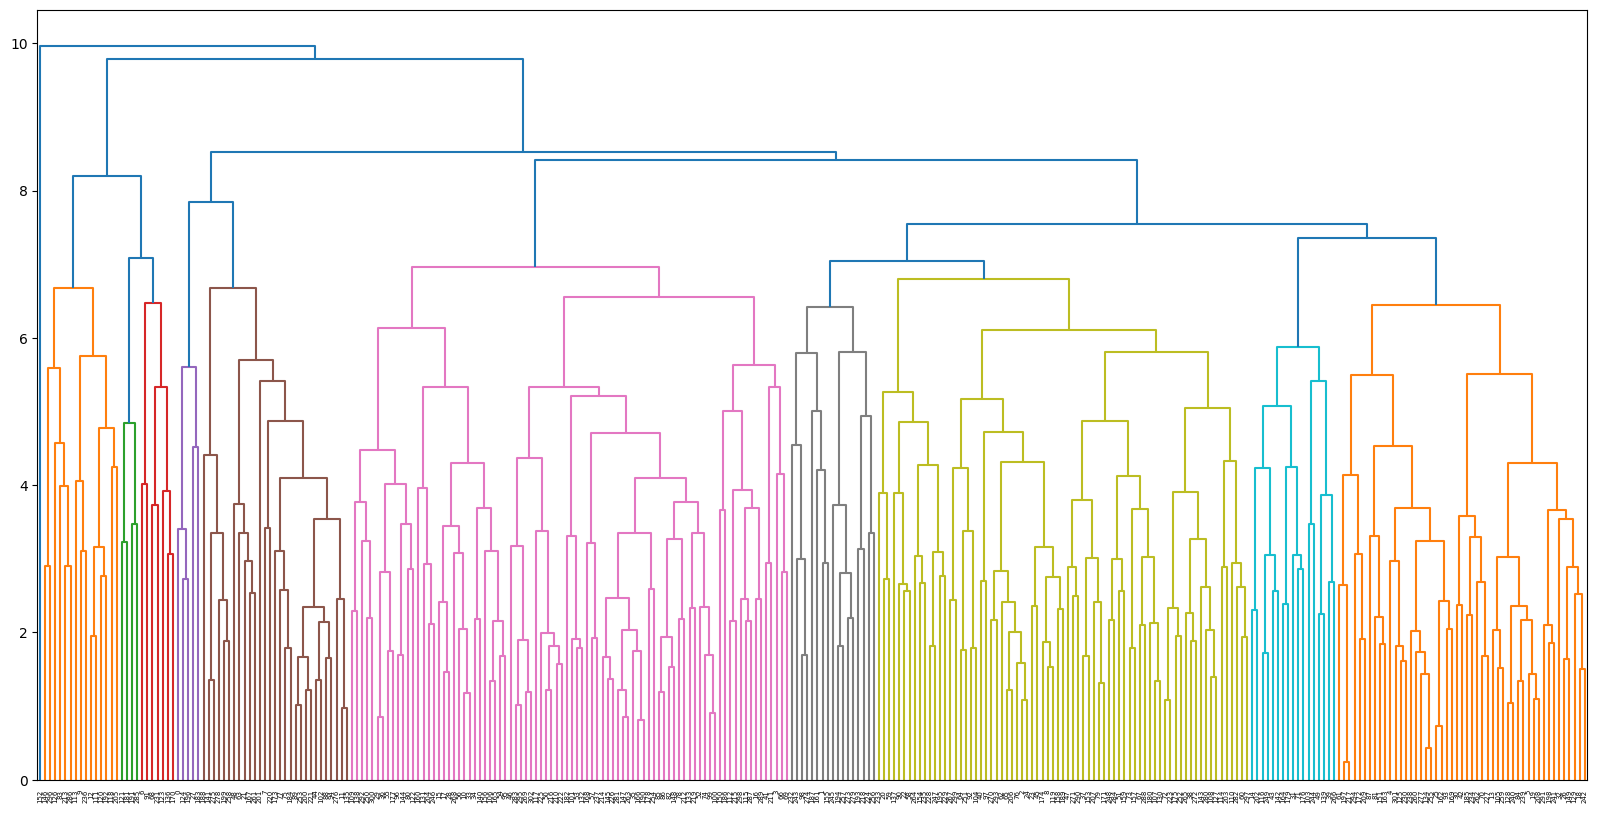

In [15]:

plt.figure(figsize=(20,10))
dendrogram(linkage(X_std, method='complete'))
plt.show()


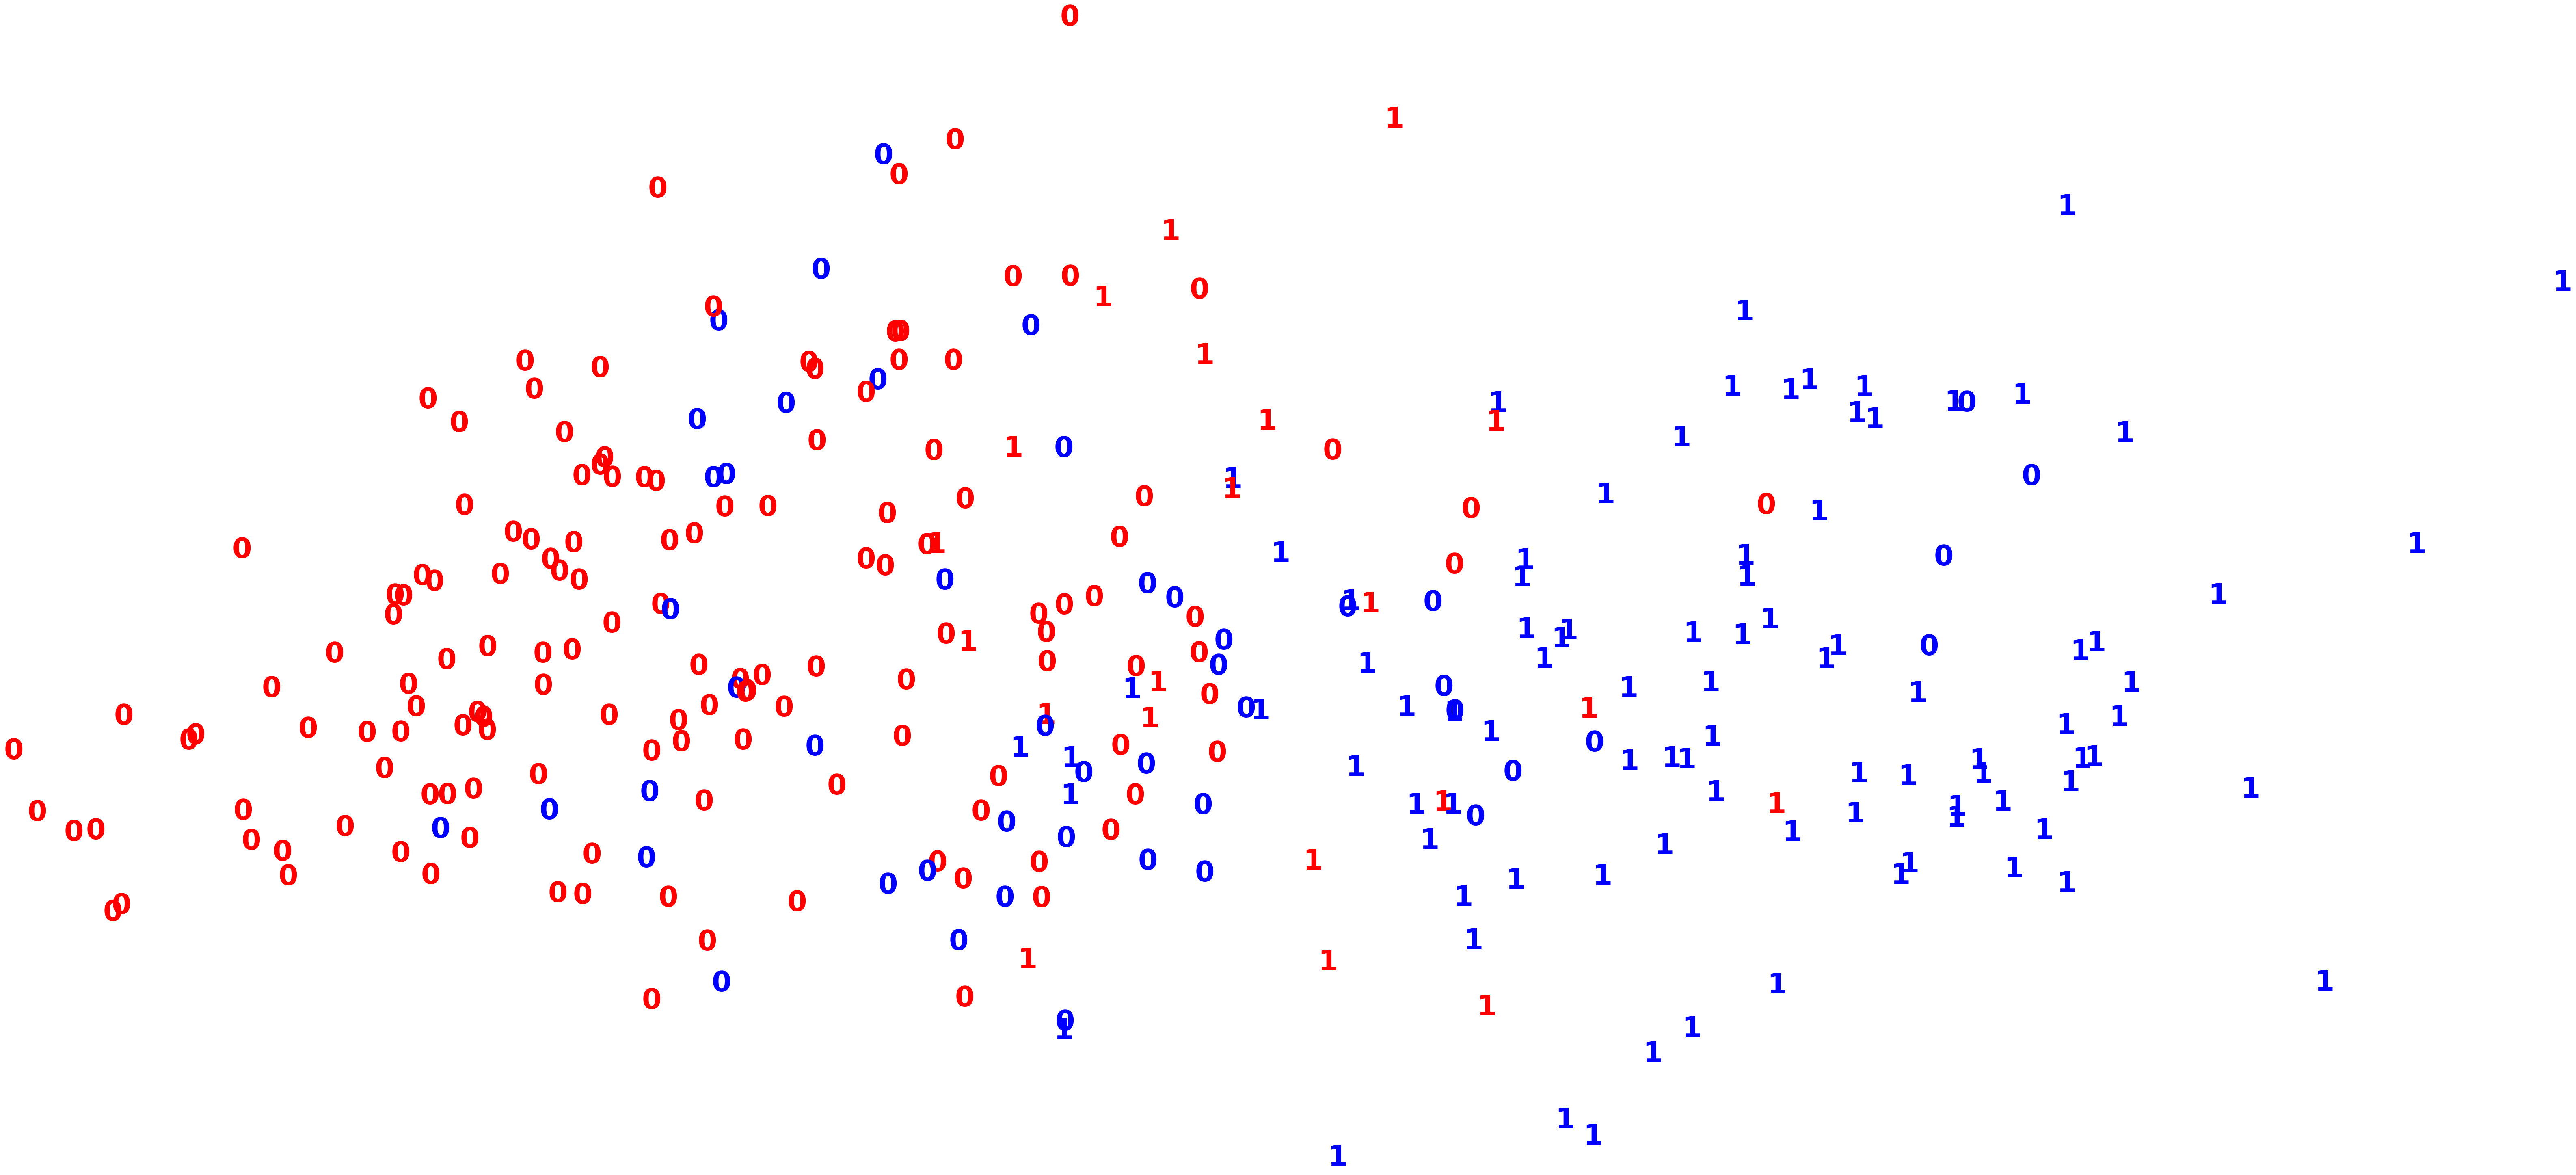

In [20]:
# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage='average',
                                      affinity='cosine',
                                      n_clusters=2)

# Fit model
clusters = agg_cluster.fit_predict(X_std)

pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()



In [21]:

print("Adjusted Rand Index of the Agglomerative Clustering solution: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))
print("The silhouette score of the Agglomerative Clustering solution: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))



Adjusted Rand Index of the Agglomerative Clustering solution: 0.29404901333534655
The silhouette score of the Agglomerative Clustering solution: 0.14837359969689895


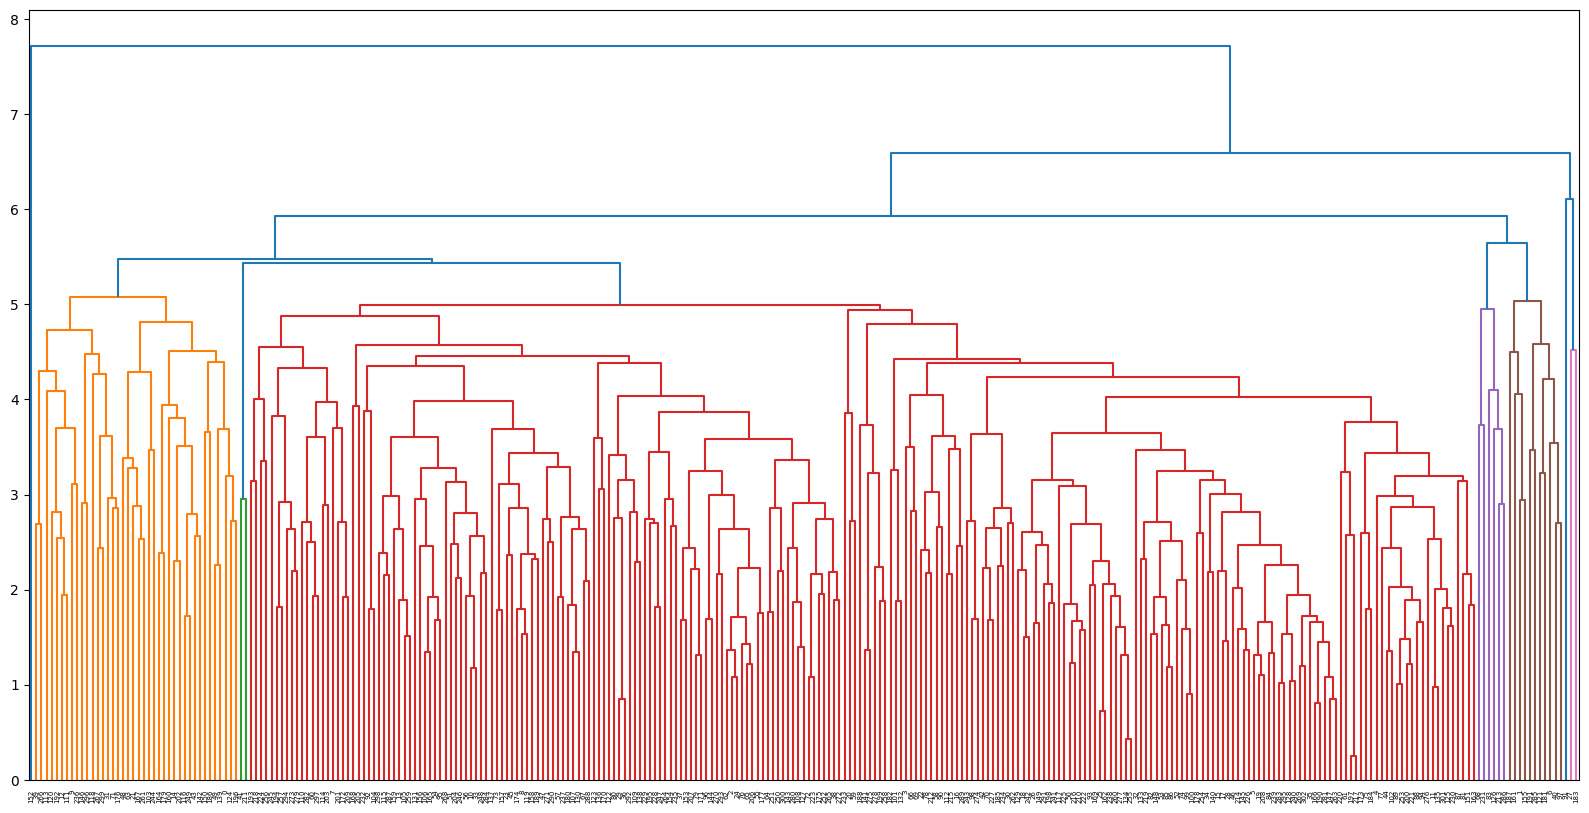

In [22]:

plt.figure(figsize=(20,10))
dendrogram(linkage(X_std, method='average'))
plt.show()

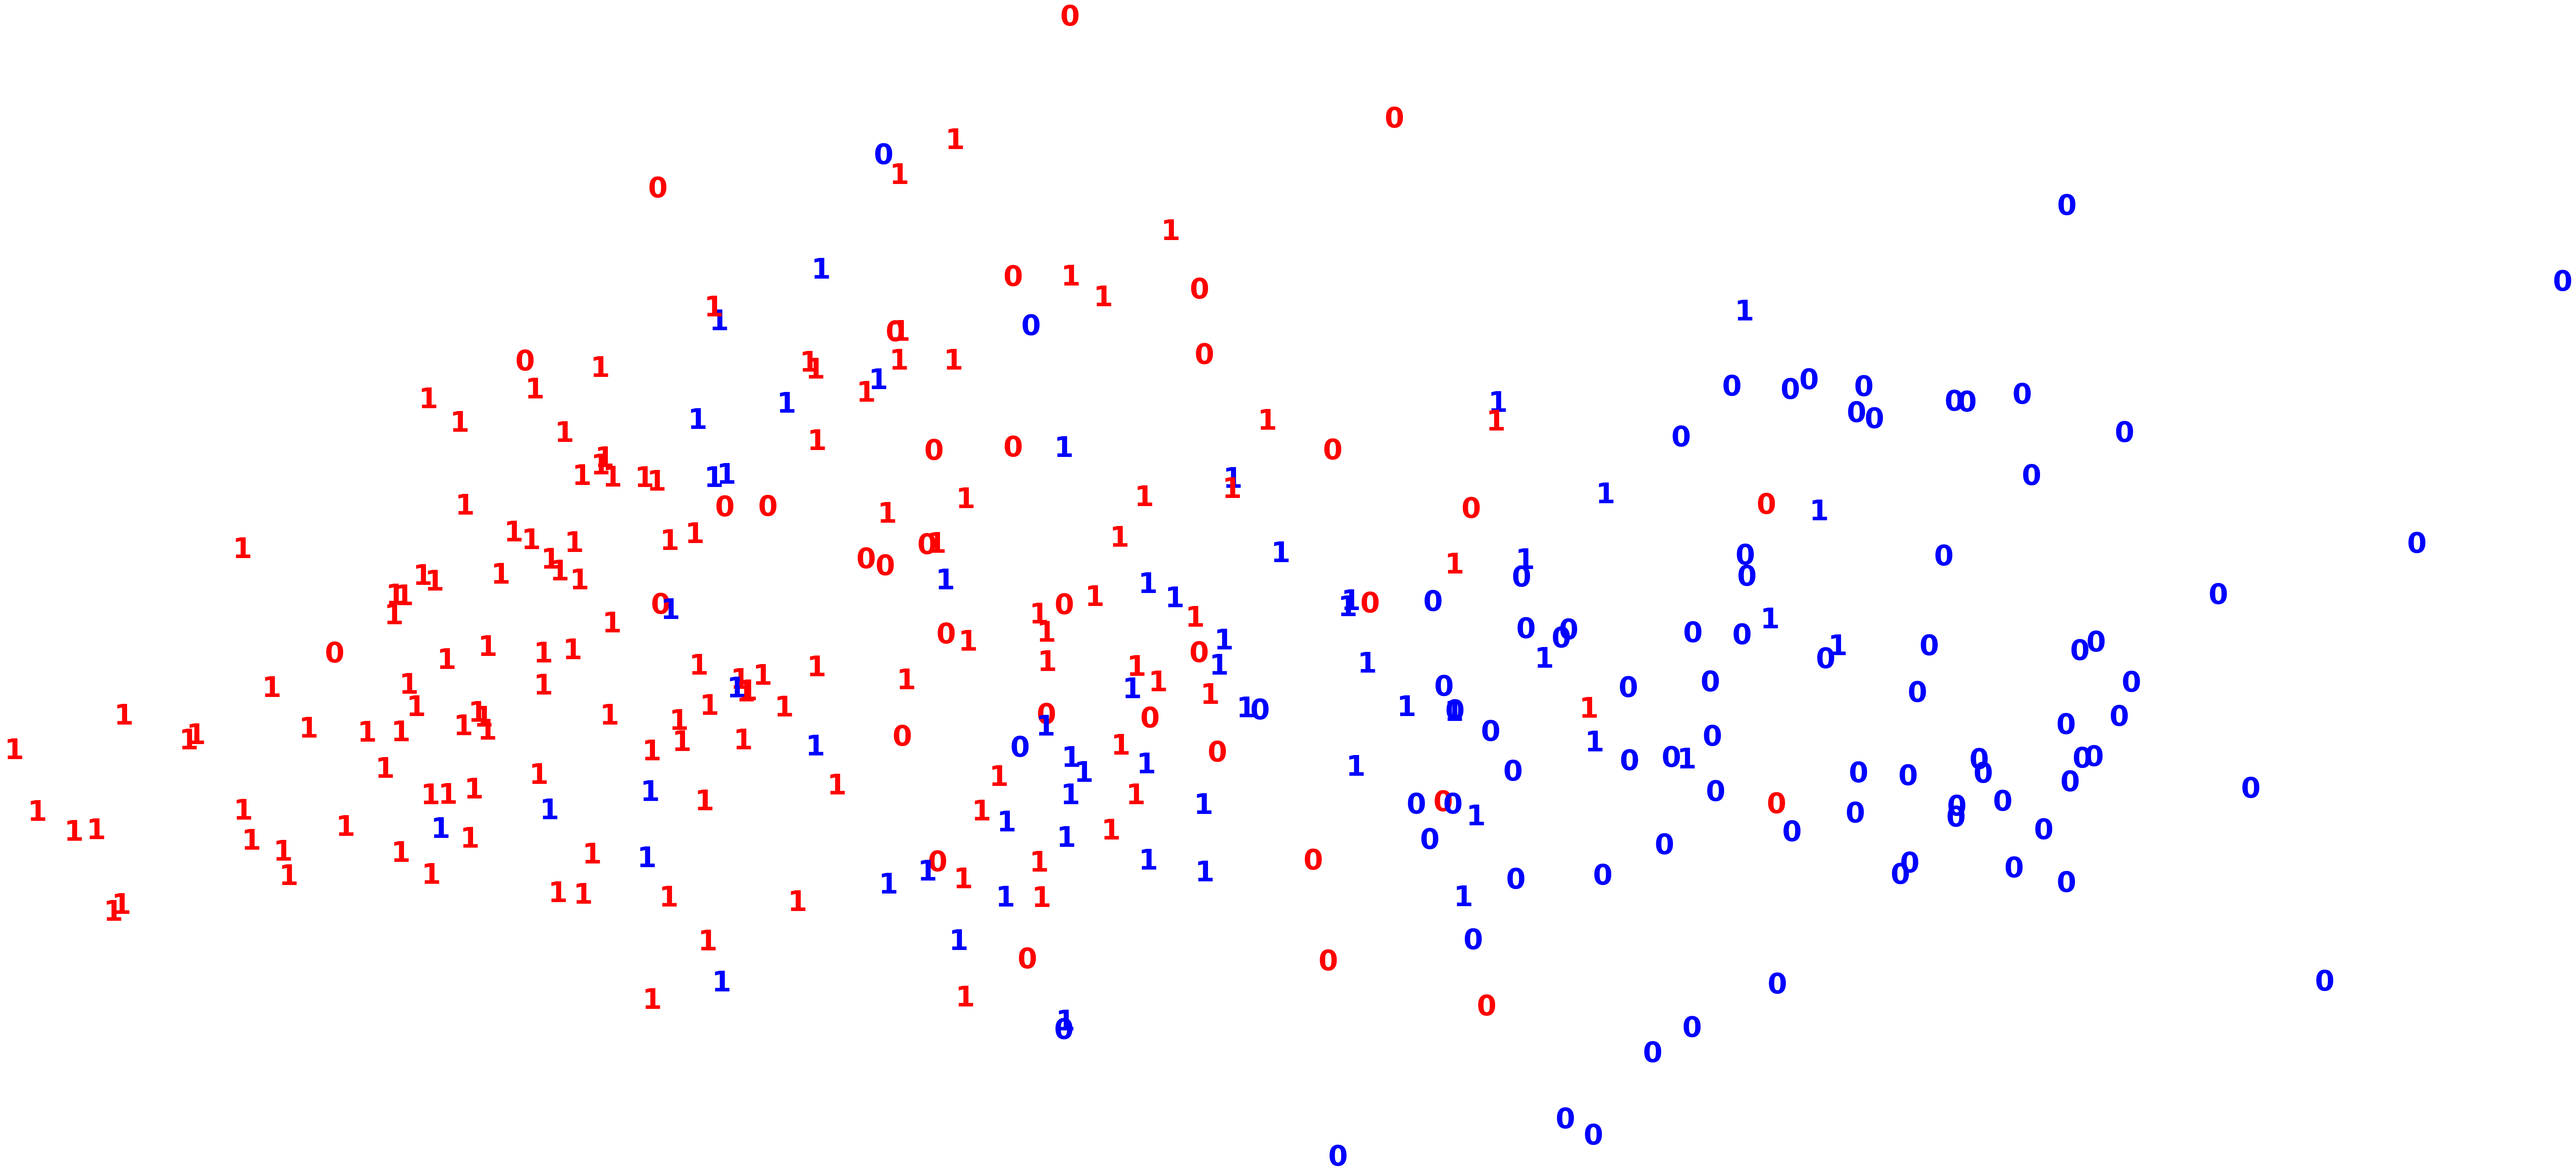

In [24]:
# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage='ward',
                                      affinity="euclidean",
                                      n_clusters=2)

# Fit model
clusters = agg_cluster.fit_predict(X_std)

pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()



In [25]:

print("Adjusted Rand Index of the Agglomerative Clustering solution: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))
print("The silhouette score of the Agglomerative Clustering solution: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))



Adjusted Rand Index of the Agglomerative Clustering solution: 0.146129913123814
The silhouette score of the Agglomerative Clustering solution: 0.1387197366557222


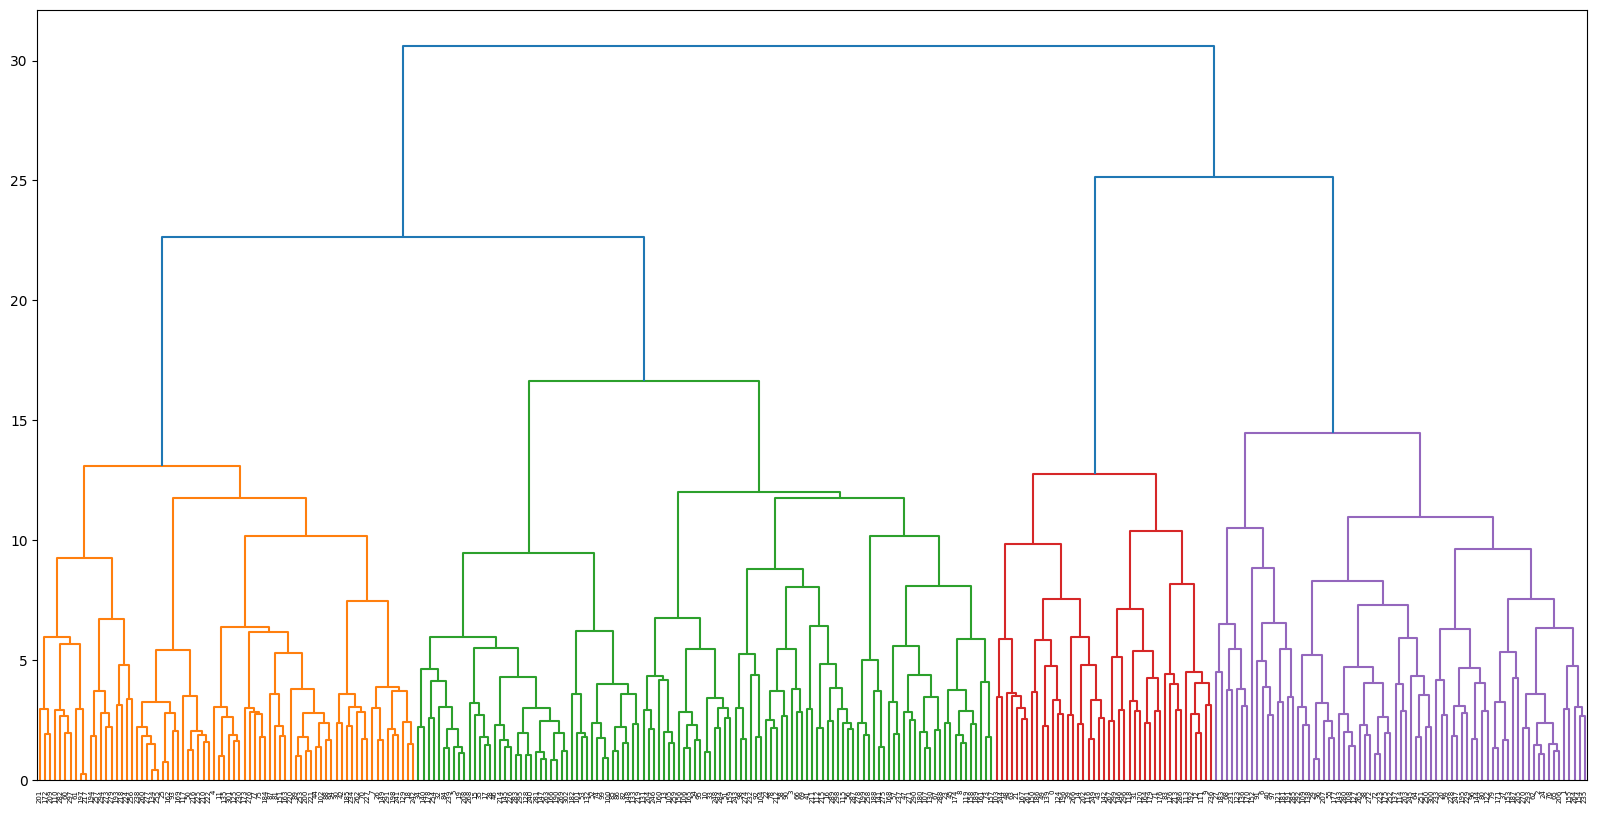

In [26]:

plt.figure(figsize=(20,10))
dendrogram(linkage(X_std, method='ward'))
plt.show()

sample solution : https://github.com/Thinkful-Ed/data-201-resources/blob/master/clustering_module_solutions/4.solution_hierarchical_clustering.ipynb

Kmeans for 2 clusters from previous lesson is 0.17440650461256255

https://colab.research.google.com/drive/19H_7DyfbXjYWg-rokdKwTXtsd4EjtaSl?usp=sharing

According to the above results [hierarchial clustering], the best scores are achieved by the linkage methode average. The ARI and silhouette scores of the two cluster k-means solution was 0.29 and 0.15 respectively. So, in terms of ARI the best model seems to be k-means, however in terms of silhouette score the best one is agglomerative clustering.